In [175]:
using Random
include("src/plotting_utils.jl")
include("src/guillotine_utils.jl")

sorted2midpoints (generic function with 1 method)

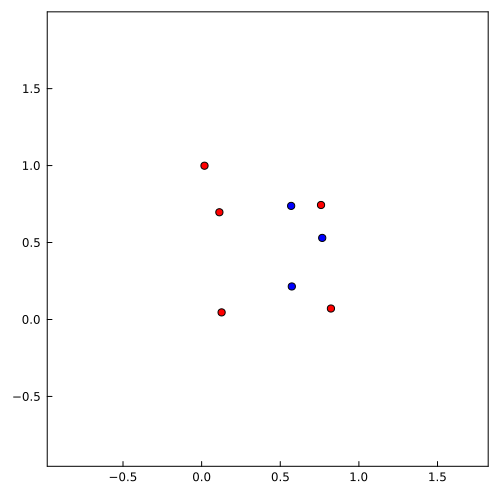

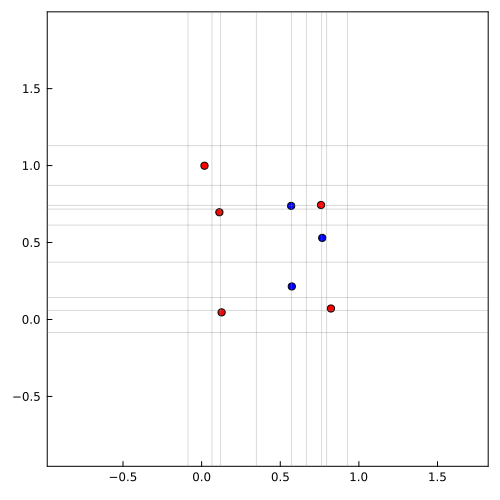

In [181]:
n = 8

S = rand(n,2)
w = rand([-1,1], n)

plt = plot_rb_points(S, w)
display(plt)
plot_add_lines!(plt, S)

8×4 Matrix{Any}:
 1  0.13  0.05  'r'
 2  0.77  0.53  'b'
 3  0.76  0.74  'r'
 4  0.11  0.7   'r'
 5  0.82  0.07  'r'
 6  0.02  1.0   'r'
 7  0.57  0.74  'b'
 8  0.57  0.21  'b'


p = 1, q = 2, i = 3, j = 3
--------------------------
                      1  2  3  4  5  6  7  8  9    midpoint index
sortperm_x          = [6, 4, 1, 7, 8, 3, 2, 5]
sortperm_x[p:p+i-1] = [6, 4, 1]

                      1  2  3  4  5  6  7  8  9    midpoint index
sortperm_y          = [1, 5, 8, 2, 4, 7, 3, 6]
sortperm_y[q:q+j-1] = [5, 8, 2]

intersection = Int64[]

     1   2  3  4  5  6   7   8    point index
w = [1, -1, 1, 1, 1, 1, -1, -1]

Disc_pqij  = abs(sum(w[intersection])) = 0
Count_pqij = length(intersection)      = 0


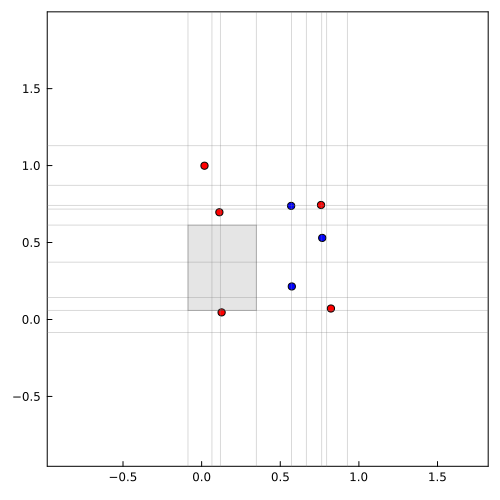

In [182]:
sortperm_x = sortperm(S[:, 1])
sorted_x = S[sortperm_x, 1]
midpoints_x = sorted2midpoints(sorted_x)

sortperm_y = sortperm(S[:, 2])
sorted_y = S[sortperm_y, 2]
midpoints_y = sorted2midpoints(sorted_y)

p = 1; q = 2; i = 3; j = 3;

M = Matrix{Any}(undef,n,4); M[:,1] = 1:n; M[:,2:3]= round.(S,digits=2); foo(x) = x==1 ? 'r' : 'b'; M[:,4] = foo.(w) 
display(M)

println("\np = $p, q = $q, i = $i, j = $j\n--------------------------")
print("                      "); for i=1:n+1 print(i,"  ") end; print("  midpoint index\n")
println("sortperm_x          = $sortperm_x")
println("sortperm_x[p:p+i-1] = $(sortperm_x[p:p+i-1])\n")
print("                      "); for i=1:n+1 print(i,"  ") end; print("  midpoint index\n")
println("sortperm_y          = $sortperm_y")
println("sortperm_y[q:q+j-1] = $(sortperm_y[q:q+j-1])\n")


int = intersect(sortperm_x[p:p+i-1],sortperm_y[q:q+j-1])
println("intersection = $int\n")

print("     "); for i=1:n print((w[i]==-1 ? " " : ""),i,"  ") end; print("  point index\n")
println("w = $w\n" )
println("Disc_pqij  = abs(sum(w[intersection])) = $(abs(sum(w[int])))")
println("Count_pqij = length(intersection)      = $(length(int))")

plot_rb_points(S, w)
plot_add_lines!(plt, S)
xx = [midpoints_x[p], midpoints_x[p], midpoints_x[p+i], midpoints_x[p+i]]
yy = [midpoints_y[q], midpoints_y[q+j], midpoints_y[q+j], midpoints_y[q]]
plot!(Shape(xx,yy), color=:gray, alpha = .2)

In [120]:
Disc_pqij(p,q,i,j) = abs(sum(w[intersect(sortperm_x[p:p+i-1],sortperm_y[q:q+j-1])]))
Count_pqij(p,q,i,j) = length(intersect(sortperm_x[p:p+i-1],sortperm_y[q:q+j-1]))

Count_pqij (generic function with 1 method)

In [183]:
inf = 100
C = 100*ones(Int,n,n,n,n)
P = zeros(Int,n,n,n,n)
D = zeros(Int,n,n,n,n)

for p = 1:n
    for q = 1:n
        for i = 1:n-p+1
            for j = 1:n-q+1
                P[p,q,i,j] = Count_pqij(p,q,i,j)
                D[p,q,i,j] = Disc_pqij(p,q,i,j)
            end
        end
        if P[p,q,1,1] != 0
            C[p,q,1,1] = D[p,q,1,1]
        end
    end
end

open("test.txt","w") do io
    print_C_pyramid(C, "      Initialization C[p,q,i,j]",io)
    println(io,"\n.\n.\n.\n")
    print_C_pyramid(P, "                     P[p,q,i,j]",io)
    println(io,"\n.\n.\n.\n")
    print_C_pyramid(D, "                     D[p,q,i,j]",io)
end

#print_C_pyramid(C, "      Initialization C[p,q,i,j]")

In [184]:

for i = 1:n
    for j = 1:n
        if i+j>2
            for p = 1:n-i+1
                for q = 1:n-j+1
                    #if P[p,q,i,j] != 0
                        # horizontal cut
                        mini_s = [zeros(Int,i-1) for i=1:4]
                        for s = 1:i-1
                            mini_s[s] = minimum.([
                                    [C[p,q,s,j],C[p+s,q,i-s,j]],
                                    [C[p,q,s,j],D[p+s,q,i-s,j]],
                                    [D[p,q,s,j],C[p+s,q,i-s,j]],
                                    [D[p,q,s,j],D[p+s,q,i-s,j]]
                                ])
                        end
                        # vertical cut
                        mini_t = [zeros(Int,j-1) for j=1:4]
                        for t = 1:j-1
                            mini_t[t] = minimum.([
                                    [C[p,q,i,t],C[p,q+t,i,j-t]],
                                    [C[p,q,i,t],D[p,q+t,i,j-t]],
                                    [D[p,q,i,t],C[p,q+t,i,j-t]],
                                    [D[p,q,i,t],D[p,q+t,i,j-t]]
                                ])
                        end

                        mini = cat(D[p,q,i,j], mini_s..., mini_t...,dims=1)
                        #println(mini)
                        println("p=$p, q=$q, i=$i, j=$j")
                        C[p,q,i,j] = maximum(mini)
                    #end
                end
            end
        end
    end
end

open("test.txt","a") do io
    println(io,"\n.\n.\n.\n")
    print_C_pyramid(C, "               Final C[p,q,i,j]",io)
end

p=1, q=1, i=1, j=2
p=1, q=2, i=1, j=2
p=1, q=3, i=1, j=2
p=1, q=4, i=1, j=2
p=1, q=5, i=1, j=2
p=1, q=6, i=1, j=2
p=1, q=7, i=1, j=2
p=2, q=1, i=1, j=2
p=2, q=2, i=1, j=2
p=2, q=3, i=1, j=2
p=2, q=4, i=1, j=2
p=2, q=5, i=1, j=2
p=2, q=6, i=1, j=2
p=2, q=7, i=1, j=2
p=3, q=1, i=1, j=2
p=3, q=2, i=1, j=2
p=3, q=3, i=1, j=2
p=3, q=4, i=1, j=2
p=3, q=5, i=1, j=2
p=3, q=6, i=1, j=2
p=3, q=7, i=1, j=2
p=4, q=1, i=1, j=2
p=4, q=2, i=1, j=2
p=4, q=3, i=1, j=2
p=4, q=4, i=1, j=2
p=4, q=5, i=1, j=2
p=4, q=6, i=1, j=2
p=4, q=7, i=1, j=2
p=5, q=1, i=1, j=2
p=5, q=2, i=1, j=2
p=5, q=3, i=1, j=2
p=5, q=4, i=1, j=2
p=5, q=5, i=1, j=2
p=5, q=6, i=1, j=2
p=5, q=7, i=1, j=2
p=6, q=1, i=1, j=2
p=6, q=2, i=1, j=2
p=6, q=3, i=1, j=2
p=6, q=4, i=1, j=2
p=6, q=5, i=1, j=2
p=6, q=6, i=1, j=2
p=6, q=7, i=1, j=2
p=7, q=1, i=1, j=2
p=7, q=2, i=1, j=2
p=7, q=3, i=1, j=2
p=7, q=4, i=1, j=2
p=7, q=5, i=1, j=2
p=7, q=6, i=1, j=2
p=7, q=7, i=1, j=2
p=8, q=1, i=1, j=2
p=8, q=2, i=1, j=2
p=8, q=3, i=1, j=2
p=8, q=4, i=

LoadError: BoundsError: attempt to access 4-element Vector{Vector{Int64}} at index [5]